In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import expon, kstest, rv_discrete

from src.code.models.galton_watson import GaltonWatson, galton_watson

# Simulation Galton-Watson

## Loi de Poisson

### λ = 1

Soit $L$ la loi de reproduction.

Nous avons $L \sim {\mathrm {Poisson}}(1)$.

In [2]:
poisson_1 = stats.poisson(1)

In [3]:
poisson_1.mean()

1.0

In [4]:
gp1 = GaltonWatson(poisson_1)
gp1

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 1.0
- époque n = 0
- nombre de survivants Z_n = 1

In [5]:
nb_survivants = gp1.simule(20)

In [6]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 0 survivants au bout de 7 époques.


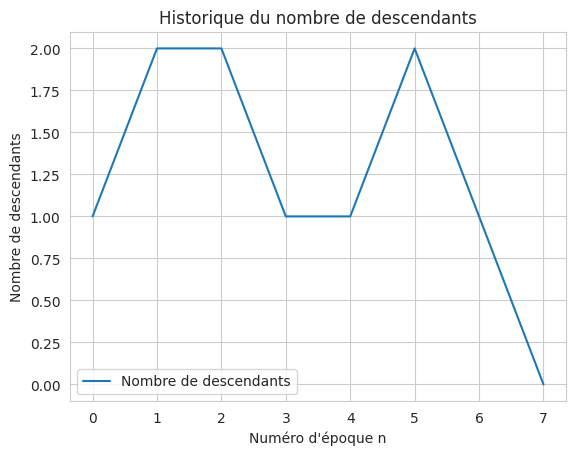

In [7]:
gp1.plot_historique_descendants()

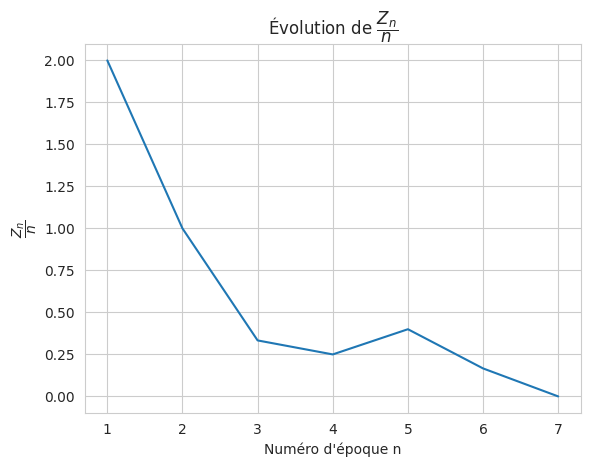

In [8]:
gp1.plot_zn_sur_n()

(array([2., 2., 1., 0., 0., 1., 0., 0., 0., 1.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

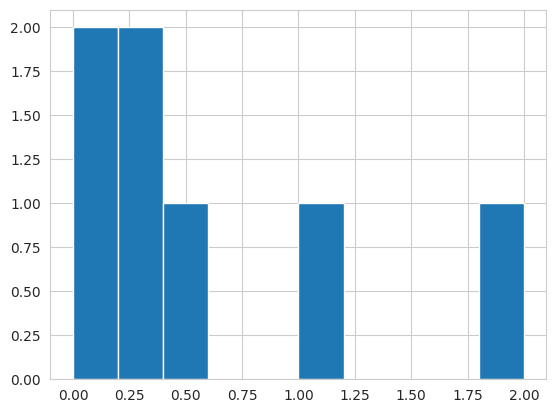

In [9]:
plt.hist(gp1.get_zn_sur_n())

### λ = 2

In [10]:
poisson_2 = stats.poisson(2)

In [11]:
gp2 = GaltonWatson(poisson_2)
gp2

Processus Galton-Watson
- loi de reproduction L : poisson
- espérance E[L] = 2.0
- époque n = 0
- nombre de survivants Z_n = 1

In [12]:
nb_survivants = gp2.simule(20)

In [13]:
print(f"Il reste {nb_survivants} survivants au bout de {gp1.n} époques.")

Il reste 1063528 survivants au bout de 7 époques.


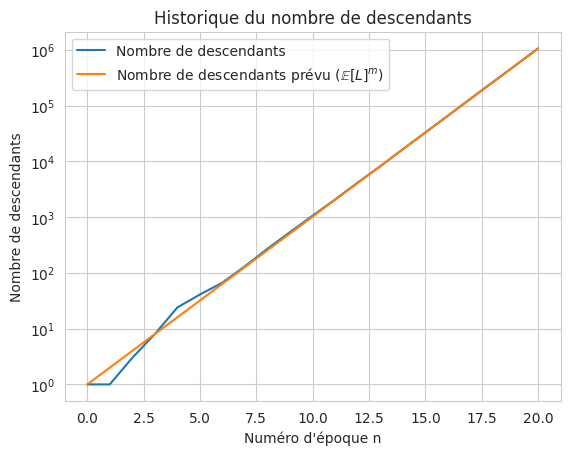

In [14]:
gp2.plot_historique_descendants(logscale=True, affiche_moyenne=True)

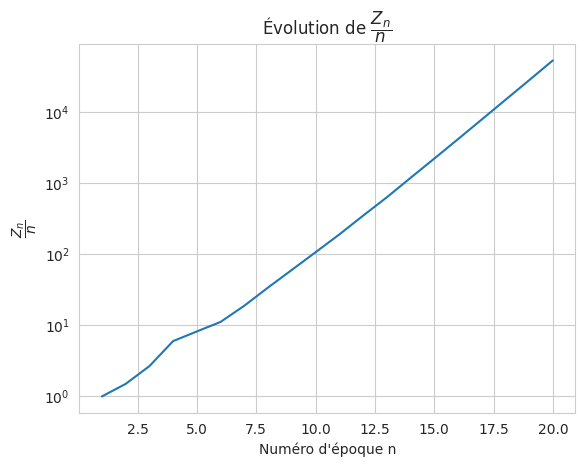

In [15]:
gp2.plot_zn_sur_n(logscale=True)

(array([16.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([1.000000e+00, 5.318540e+03, 1.063608e+04, 1.595362e+04,
        2.127116e+04, 2.658870e+04, 3.190624e+04, 3.722378e+04,
        4.254132e+04, 4.785886e+04, 5.317640e+04]),
 <BarContainer object of 10 artists>)

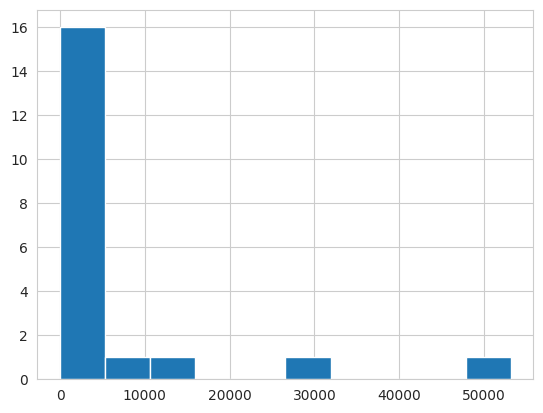

In [16]:
plt.hist(gp2.get_zn_sur_n())

## Essais $Z_n / n$

In [102]:
simu = []

nb_simulations = 10_000
nb_epoques = 100

for i in range(nb_simulations):
    gp1.reset()
    resultat = gp1.simule(nb_epoques)
    simu.append(resultat)

In [103]:
simu_poisson1 = np.array(simu)

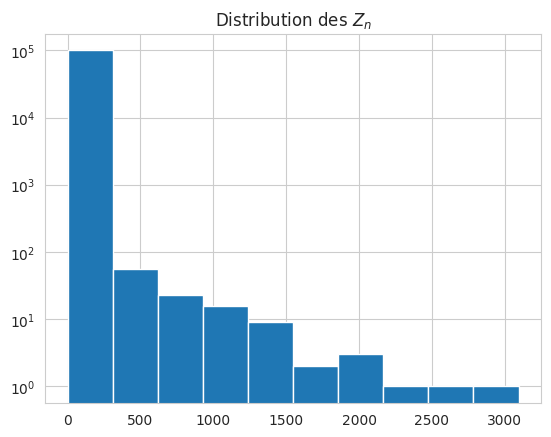

In [122]:
plt.title("Distribution des $Z_n$")
plt.hist(simu_poisson1)
plt.yscale("log")

In [105]:
np.sum(simu_poisson1 > 0)

202

In [107]:
zn_sup_zero = simu_poisson1[simu_poisson1 > 0]

(array([90., 57., 22., 16.,  9.,  2.,  3.,  1.,  1.,  1.]),
 array([1.0000e+00, 3.1040e+02, 6.1980e+02, 9.2920e+02, 1.2386e+03,
        1.5480e+03, 1.8574e+03, 2.1668e+03, 2.4762e+03, 2.7856e+03,
        3.0950e+03]),
 <BarContainer object of 10 artists>)

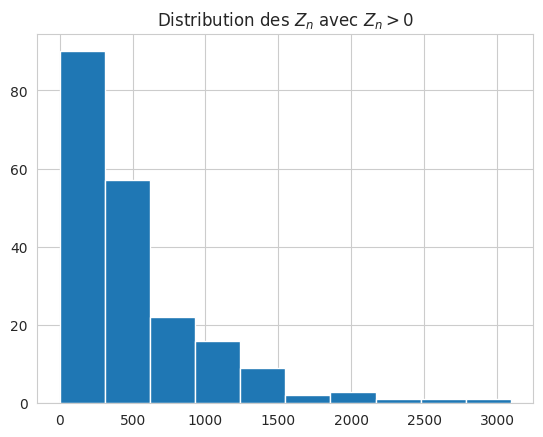

In [124]:
plt.title("Distribution des $Z_n$ avec $Z_n > 0$")
plt.hist(zn_sup_zero)

In [109]:
lambda_estime = 1.0 / np.mean(zn_sup_zero / nb_epoques)
print(f"{lambda_estime = }")

lambda_estime = 1.9468190711167226


In [111]:
loi_expo1 = stats.expon(scale=1 / lambda_estime)

In [112]:
echantillon_expo = loi_expo1.rvs(size=len(zn_sup_zero))

(array([95., 50., 24., 13., 10.,  9.,  0.,  0.,  0.,  1.]),
 array([4.30894847e-04, 3.01906678e-01, 6.03382460e-01, 9.04858243e-01,
        1.20633403e+00, 1.50780981e+00, 1.80928559e+00, 2.11076137e+00,
        2.41223716e+00, 2.71371294e+00, 3.01518872e+00]),
 <BarContainer object of 10 artists>)

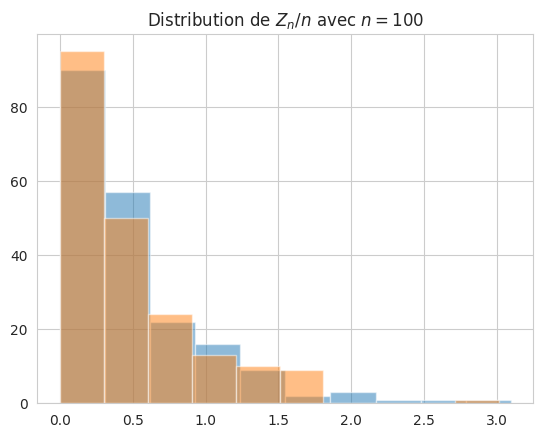

In [118]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
plt.hist(zn_sup_zero / nb_epoques, alpha=0.5)
plt.hist(echantillon_expo, alpha=0.5)

<Axes: title={'center': 'Distribution de $Z_{n} / n$ avec $n = 100$'}, ylabel='Probability'>

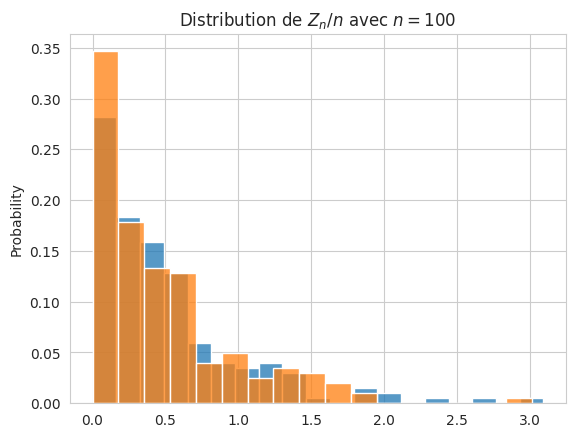

In [119]:
plt.title(f"Distribution de $Z_{{n}} / n$ avec $n = 100$")
sns.histplot(zn_sup_zero / nb_epoques, stat="probability")
sns.histplot(echantillon_expo, stat="probability")

In [115]:
# Exemple de données
donnees = zn_sup_zero / nb_epoques

# Paramètre lambda estimé (par exemple, à partir de la méthode du maximum de vraisemblance)
lambda_estime = 1.0 / np.mean(donnees)
print(f"{lambda_estime = }")

# Effectuer le test de Kolmogorov-Smirnov
statistique_ks, p_value = kstest(donnees, "expon", args=(0, 1 / lambda_estime))

# Afficher les résultats
print("Statistique KS:", statistique_ks)
print("P-value:", p_value)

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p_value < alpha:
    print("Les données ne suivent pas une loi exponentielle.")
else:
    print("Les données suivent une loi exponentielle.")

lambda_estime = 1.9468190711167226
Statistique KS: 0.043542816866810025
P-value: 0.8220961119584229
Les données suivent une loi exponentielle.
